<a href="https://colab.research.google.com/github/ogiogidayo/machine-learning/blob/main/ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 分類/回帰 2024/10/24

### 基本操作など

In [ ]:
from sklearn import datasets
import pandas as pd

housing = datasets.fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
print(housing.data)
# housing["data"]

print(housing.data.shape)
print(housing.target_names)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
(20640, 8)
['MedHouseVal']


In [ ]:
# DataFrame型に変換
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)

# 最初の5行のみ取得
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df_housing_target = pd.DataFrame(housing.target, columns=housing.target_names)

df_housing_target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### データのmerge

In [ ]:
df_housing["Price"] = housing.target
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### ヒストグラム表示

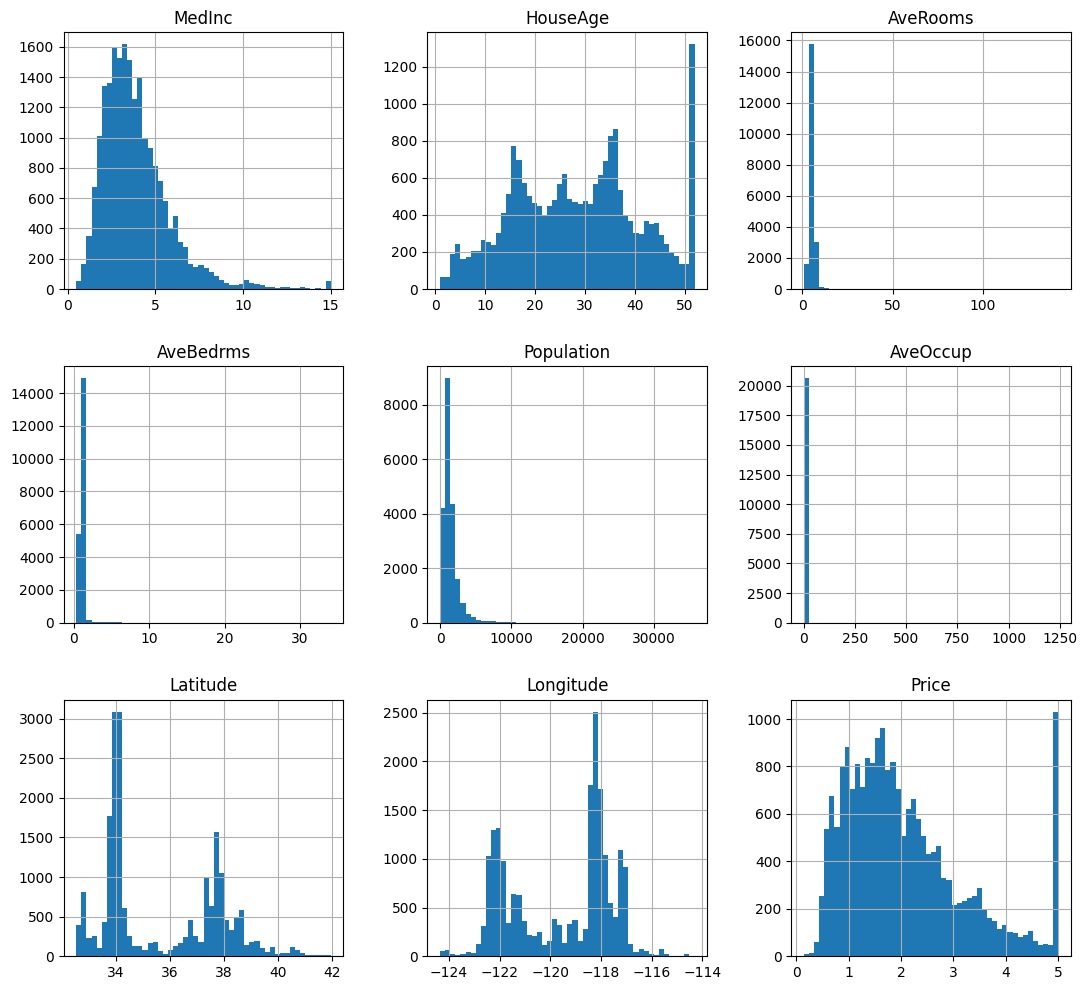

In [ ]:
import matplotlib.pyplot as plt

df_housing.hist(bins=50, figsize=(13,12))

plt.show()

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 統計量の表示

In [ ]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### データの加工

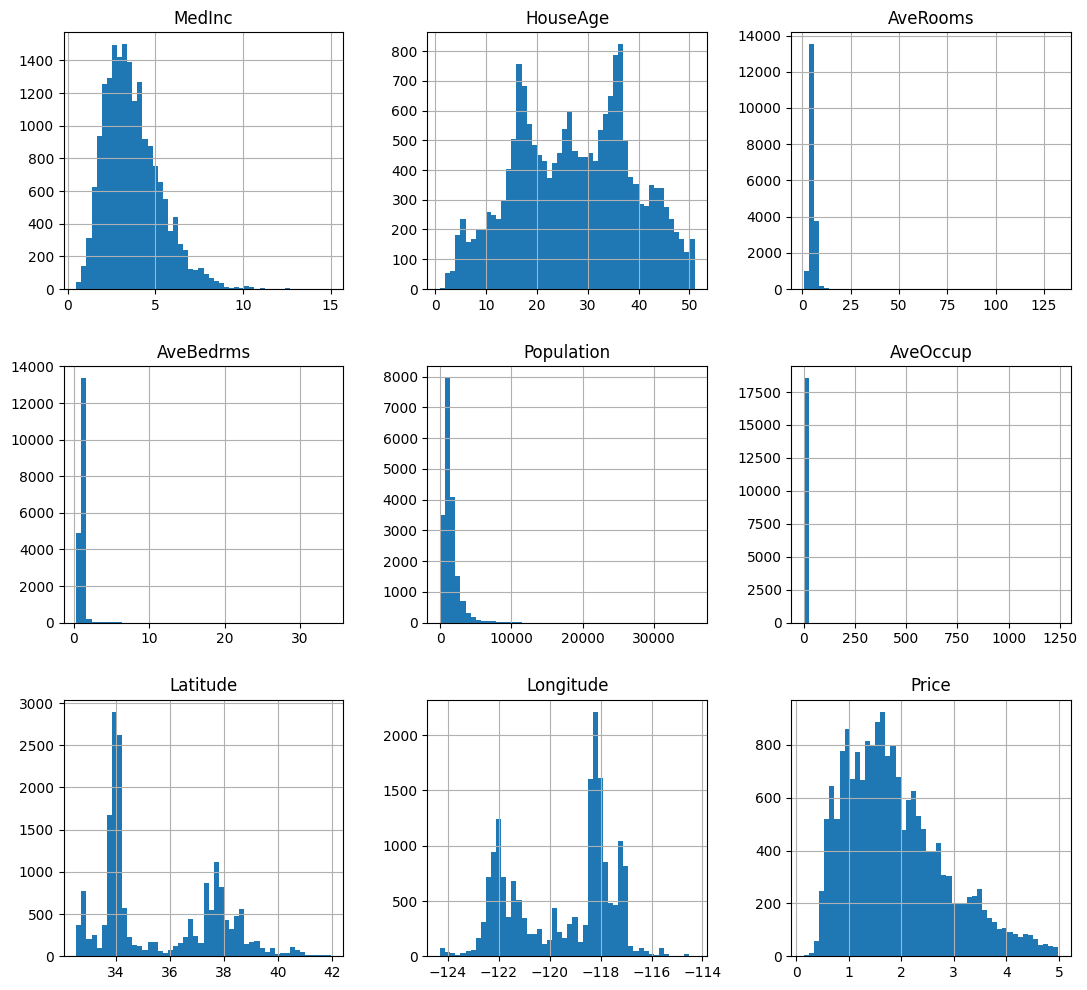

In [ ]:
df_housing = df_housing[df_housing["HouseAge"] < 52]
df_housing = df_housing[df_housing["Price"] < 5]

df_housing.hist(bins=50, figsize=(13,12))

plt.show()

### 各項目の相関を表示

In [ ]:
df_housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.203107,0.317168,-0.066021,0.040688,0.025537,-0.075389,-0.016118,0.664340
HouseAge,-0.203107,1.000000,-0.181193,-0.087111,-0.280741,0.019691,-0.051712,-0.034155,0.014121
AveRooms,0.317168,-0.181193,1.000000,0.849237,-0.073623,-0.007056,0.129698,-0.038019,0.115232
AveBedrms,-0.066021,-0.087111,0.849237,1.000000,-0.072172,-0.007865,0.077281,0.011199,-0.061008
Population,0.040688,-0.280741,-0.073623,-0.072172,1.000000,0.065287,-0.107190,0.091001,0.022542
AveOccup,0.025537,0.019691,-0.007056,-0.007865,0.065287,1.000000,0.002153,0.000967,-0.020193
Latitude,-0.075389,-0.051712,0.129698,0.077281,-0.107190,0.002153,1.000000,-0.922738,-0.171565
Longitude,-0.016118,-0.034155,-0.038019,0.011199,0.091001,0.000967,-0.922738,1.000000,-0.022901
Price,0.664340,0.014121,0.115232,-0.061008,0.022542,-0.020193,-0.171565,-0.022901,1.000000


In [ ]:
# 色分けして見やすくする
df_housing.corr().style.background_gradient(axis=None)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.203107,0.317168,-0.066021,0.040688,0.025537,-0.075389,-0.016118,0.664340
HouseAge,-0.203107,1.000000,-0.181193,-0.087111,-0.280741,0.019691,-0.051712,-0.034155,0.014121
AveRooms,0.317168,-0.181193,1.000000,0.849237,-0.073623,-0.007056,0.129698,-0.038019,0.115232
AveBedrms,-0.066021,-0.087111,0.849237,1.000000,-0.072172,-0.007865,0.077281,0.011199,-0.061008
Population,0.040688,-0.280741,-0.073623,-0.072172,1.000000,0.065287,-0.107190,0.091001,0.022542
AveOccup,0.025537,0.019691,-0.007056,-0.007865,0.065287,1.000000,0.002153,0.000967,-0.020193
Latitude,-0.075389,-0.051712,0.129698,0.077281,-0.107190,0.002153,1.000000,-0.922738,-0.171565
Longitude,-0.016118,-0.034155,-0.038019,0.011199,0.091001,0.000967,-0.922738,1.000000,-0.022901
Price,0.664340,0.014121,0.115232,-0.061008,0.022542,-0.020193,-0.171565,-0.022901,1.000000


# 11/7

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18555 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      18555 non-null  float64
 1   HouseAge    18555 non-null  float64
 2   AveRooms    18555 non-null  float64
 3   AveBedrms   18555 non-null  float64
 4   Population  18555 non-null  float64
 5   AveOccup    18555 non-null  float64
 6   Latitude    18555 non-null  float64
 7   Longitude   18555 non-null  float64
 8   Price       18555 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000
mean,3.693194,26.981299,5.387533,1.098429,1470.684398,3.109436,35.594189,-119.485306,1.893232
std,1.570195,11.434147,2.338253,0.463999,1163.197359,10.816549,2.147977,1.980966,0.953720
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.300000,0.149990
25%,2.537250,17.000000,4.432009,1.005789,811.000000,2.469992,33.920000,-121.550000,1.154000
50%,3.465900,27.000000,5.210412,1.048299,1203.000000,2.856089,34.240000,-118.450000,1.711000
75%,4.616100,36.000000,5.989601,1.099138,1781.000000,3.321153,37.670000,-117.970000,2.431000
max,15.000100,51.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.991000


In [ ]:
border = df_housing['AveRooms'].mean()
df_housing = df_housing[df_housing['AveRooms'] < border * 2]
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000
mean,3.692577,27.074227,5.236979,1.067795,1479.494939,3.114738,35.580626,-119.489352,1.895912
std,1.566063,11.420427,1.183488,0.135705,1163.813440,10.868402,2.141005,1.980678,0.954552
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.300000,0.149990
25%,2.536300,18.000000,4.422734,1.005248,820.000000,2.474175,33.920000,-121.570000,1.154000
50%,3.464300,27.000000,5.193914,1.047440,1212.000000,2.861512,34.230000,-118.450000,1.714000
75%,4.617375,36.000000,5.964126,1.097222,1785.250000,3.328622,37.660000,-117.970000,2.435000
max,13.147700,51.000000,10.765466,3.411111,35682.000000,1243.333333,41.950000,-114.550000,4.991000


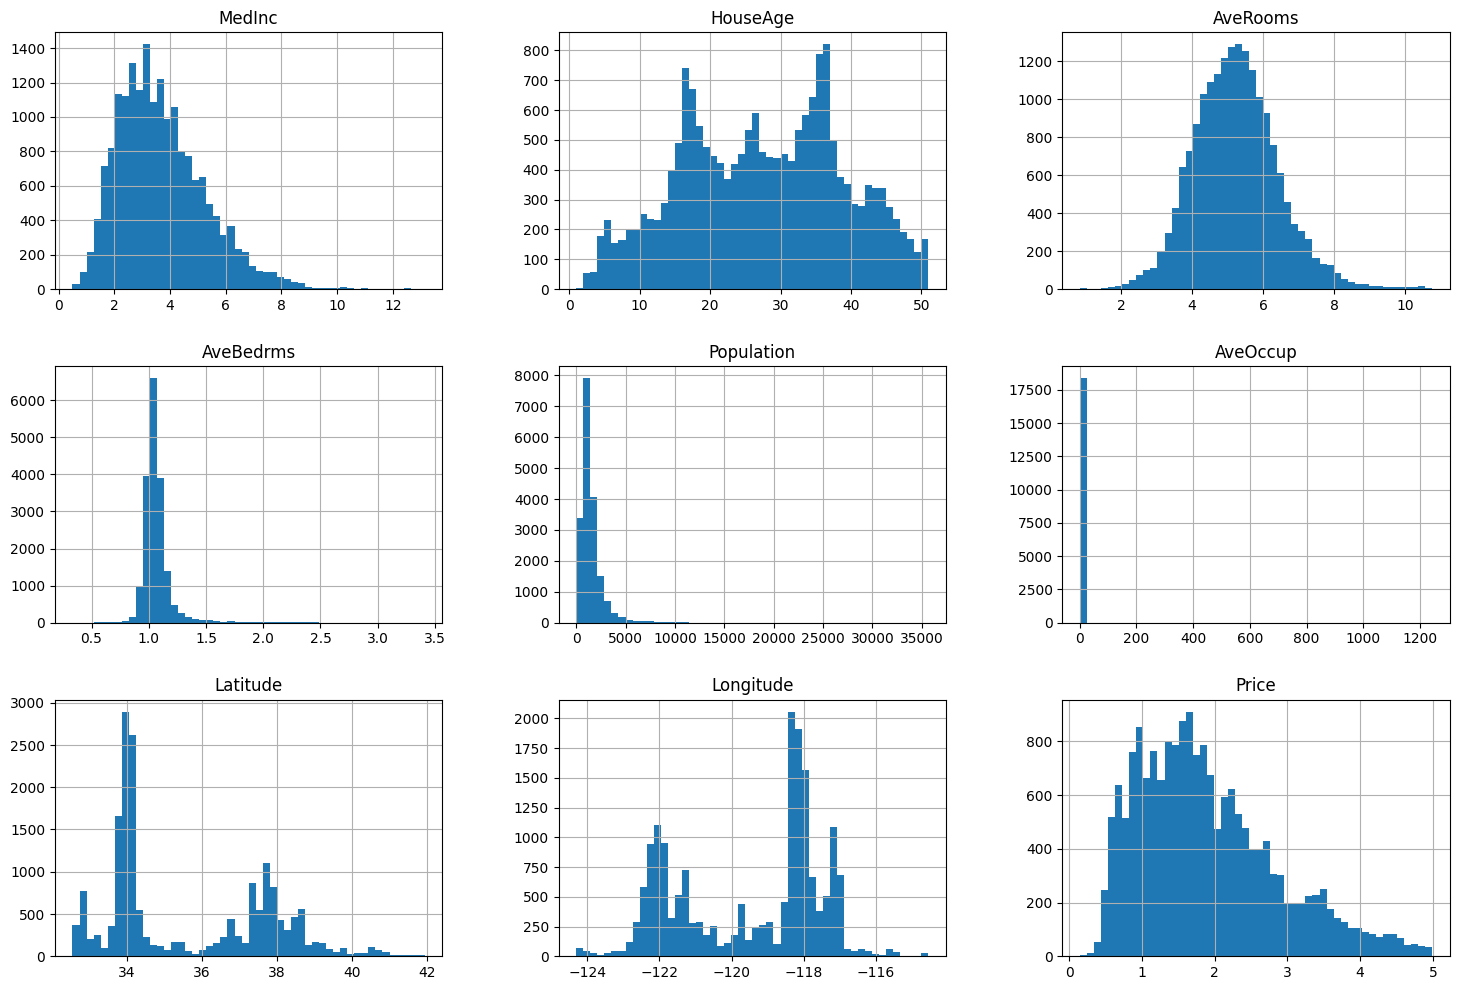

In [ ]:
df_housing.hist(bins=50, figsize=(18, 12))
plt.show()

In [ ]:
border = df_housing['AveBedrms'].mean()
df_housing = df_housing[df_housing['AveBedrms'] < border * 2]
border = df_housing['Population'].mean()
df_housing = df_housing[df_housing['Population'] < border * 2]
border = df_housing['AveOccup'].mean()
df_housing = df_housing[df_housing['AveOccup'] < border * 2]
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000
mean,3.682136,27.839496,5.233402,1.064351,1245.108442,2.927994,35.613734,-119.522788,1.895046
std,1.565765,11.216134,1.154149,0.120498,616.566436,0.705501,2.152877,1.981163,0.964632
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.300000,0.149990
25%,2.526750,18.000000,4.436858,1.002907,793.000000,2.457944,33.920000,-121.600000,1.136000
50%,3.453100,28.000000,5.192029,1.046414,1152.000000,2.842236,34.250000,-118.470000,1.713000
75%,4.603550,36.000000,5.951699,1.096746,1623.000000,3.296953,37.680000,-117.990000,2.442000
max,13.147700,51.000000,10.765466,2.127208,2962.000000,5.896552,41.950000,-114.550000,4.991000


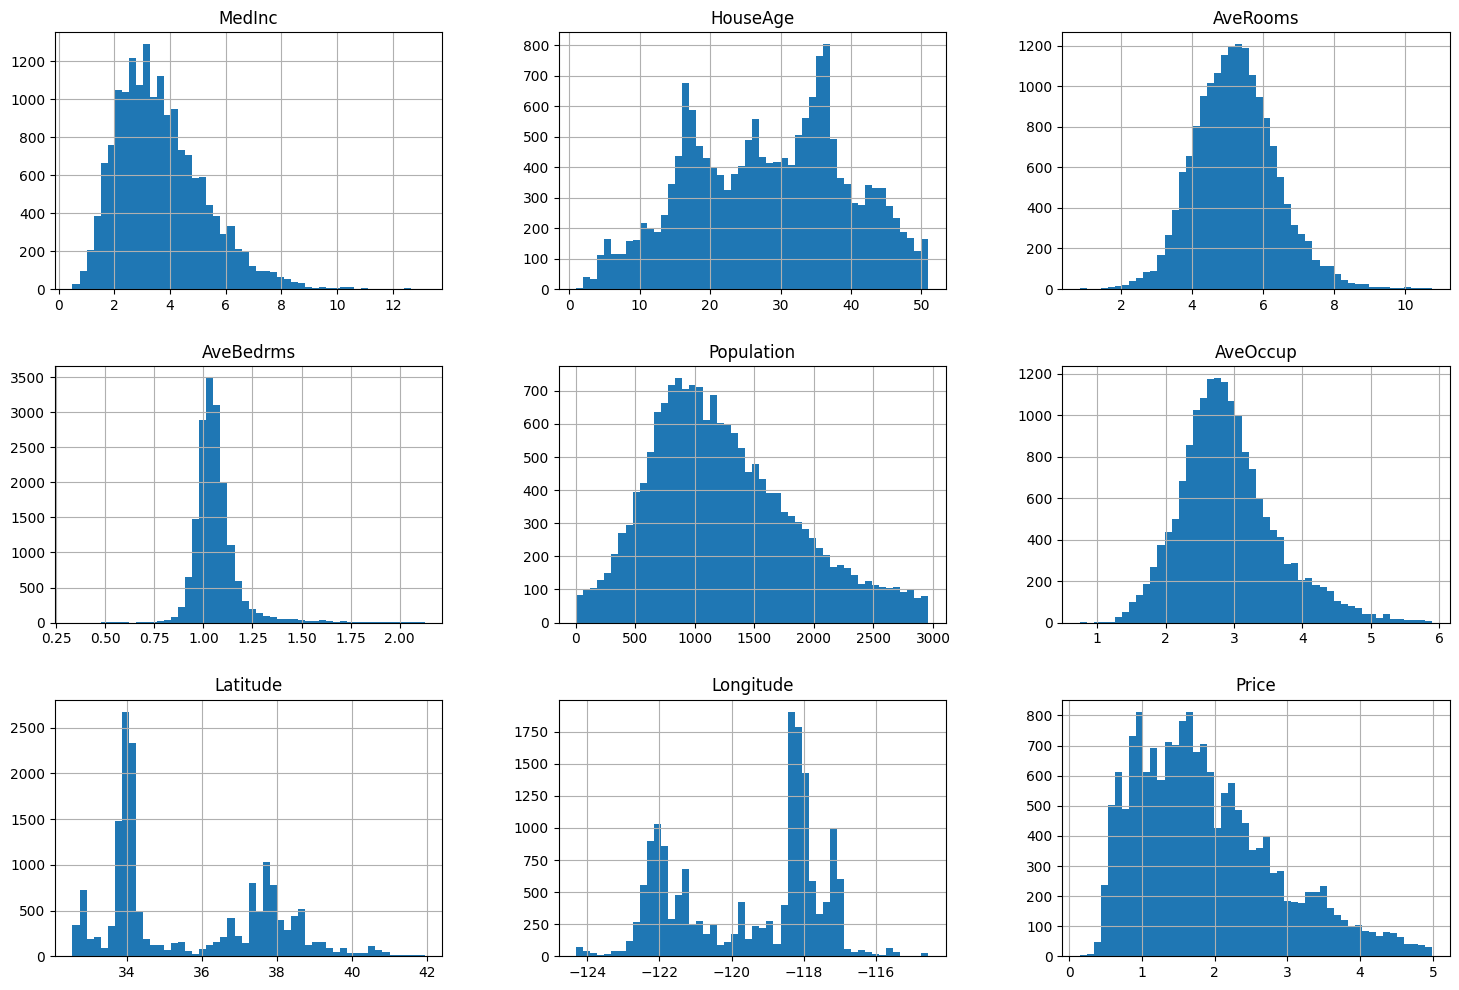

In [ ]:
df_housing.hist(bins=50, figsize=(18, 12))
plt.show()

### データの正規化

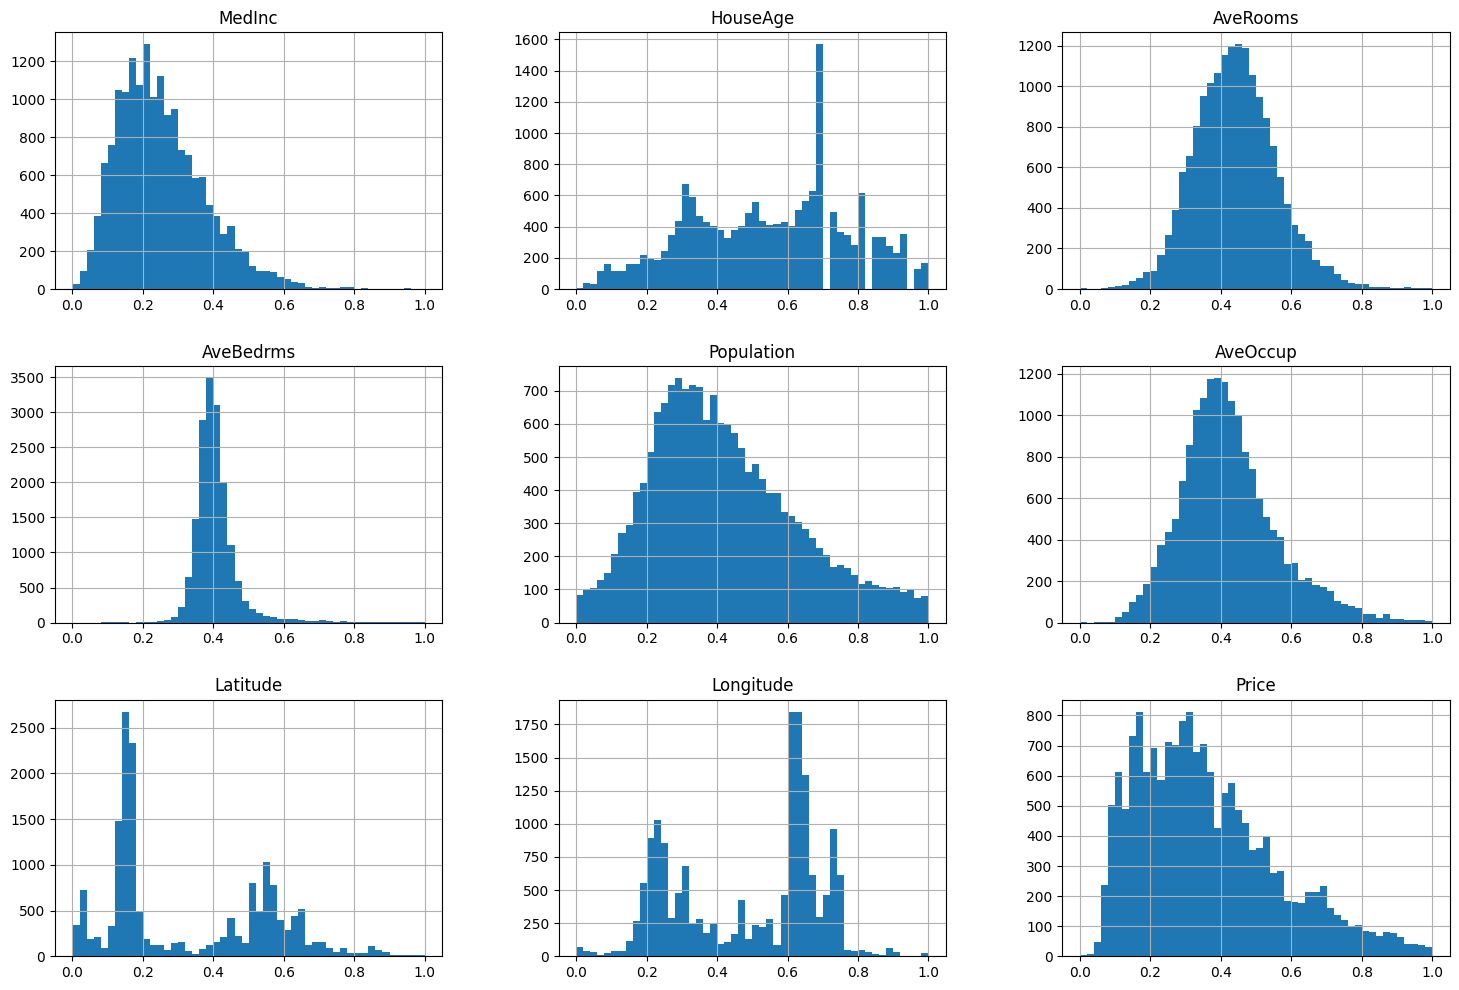

In [ ]:
def minmax_norm(df):
  return (df - df.min()) / (df.max() - df.min())

df_housing = minmax_norm(df_housing)

df_housing.hist(bins=50, figsize=(18,12))
plt.show()

# ホールドアウト法
- データセットを学習用と評価用に分割し道の入力に対する汎化性能を上げる

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_housing, test_size=0.2)

df_train.info()

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13522 entries, 2733 to 1143
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      13522 non-null  float64
 1   HouseAge    13522 non-null  float64
 2   AveRooms    13522 non-null  float64
 3   AveBedrms   13522 non-null  float64
 4   Population  13522 non-null  float64
 5   AveOccup    13522 non-null  float64
 6   Latitude    13522 non-null  float64
 7   Longitude   13522 non-null  float64
 8   Price       13522 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 3381 entries, 2530 to 6979
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3381 non-null   float64
 1   HouseAge    3381 non-null   float64
 2   AveRooms    3381 non-null   float64
 3   AveBedrms   3381 non-null   float64
 4   Population  3381 non-null   float64
 5   AveOccup

# 交差検証
## LFold
- データセットの一部を評価用、残りを学習用とするが、評価用データを都度入れ替えながら複数回試行
- 複数回の結果の平均値を向上させることで、汎化性能を上げる
- 全てのデータが一度は評価データとして使われる

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False)

for train, test in kf.split(df_housing):
  print(train, test)
  df_kfold_train = df_housing.iloc[train]
  df_kfold_test = df_housing.iloc[test]

[ 3381  3382  3383 ... 16900 16901 16902] [   0    1    2 ... 3378 3379 3380]
[    0     1     2 ... 16900 16901 16902] [3381 3382 3383 ... 6759 6760 6761]
[    0     1     2 ... 16900 16901 16902] [ 6762  6763  6764 ... 10140 10141 10142]
[    0     1     2 ... 16900 16901 16902] [10143 10144 10145 ... 13520 13521 13522]
[    0     1     2 ... 13520 13521 13522] [13523 13524 13525 ... 16900 16901 16902]


収入中央値か（MedInc）から住宅価格（Price）を予測する単回帰モデルを構築する。
`x_train`: 説明変数
`y_train`: 目的変数

In [ ]:
x_train = df_train[['MedInc']]
y_train = df_train[['Price']]

In [ ]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

`coef_`: 線形回帰モデルの傾き
`intercept_`: 線形回帰モデルの切片

In [ ]:
a = clf.coef_
b = clf.intercept_
print('coefficient a = ', a)
print('intercept b = ', b)

coefficient a =  [[1.08113168]]
intercept b =  [0.08843191]


Text(0.5, 0, 'MedInc')

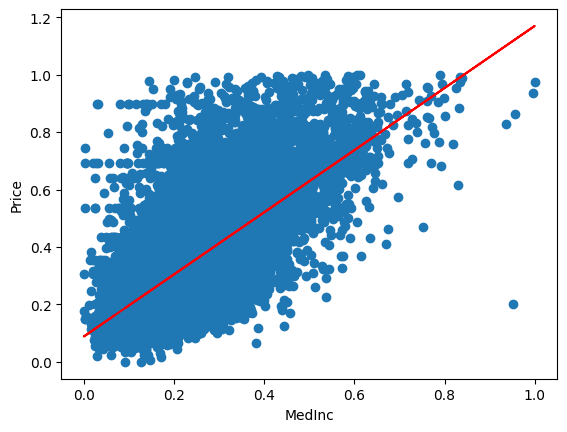

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, a * x_train + b, 'r')

plt.ylabel('Price')
plt.xlabel('MedInc')

平均二乗誤差（MSE）を求める. 小さければ小さいほど良い
$$MSE = \frac{1}{n} \Sigma _{i = 1}^{n} (\hat{y_i}-y_i)^2 $$



In [ ]:
from sklearn.metrics import mean_squared_error

x_test = df_test[['MedInc']]
y_test = df_test[['Price']]

y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE = ', mse)

MSE =  0.021584801331980836


全ての説明変数から住宅価格（Price）を予測する重回帰モデルを構築する

In [ ]:
x_train = df_train.drop('Price', axis=1)
y_train = df_train[['Price']]

In [ ]:
clf = linear_model.LinearRegression()

clf.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test = df_test.drop('Price', axis=1)
y_test = df_test[['Price']]

y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE = ', mse)

MSE =  0.01376851023527835


In [ ]:
df_coef = pd.DataFrame(housing.feature_names, columns=['Name'])
df_coef['coeficient'] = clf.coef_[0]

df_coef

,Name,coeficient
0,MedInc,1.154523
1,HouseAge,0.086148
2,AveRooms,-0.248578
3,AveBedrms,0.346976
4,Population,0.042088
5,AveOccup,-0.341443
6,Latitude,-0.729802
7,Longitude,-0.739341
